<a href="https://colab.research.google.com/github/rj-adity/Cervical-Cancer/blob/main/cervical_cancer2502.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import pandas as pd
import numpy as np

In [4]:
!pip install kaggle

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rjadityasingh","key":"0e5ecae6a3999265fa65ab93c5f6b927"}'}

In [54]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


In [7]:
!kaggle datasets download -d prahladmehandiratta/cervical-cancer-largest-dataset-sipakmed/

Dataset URL: https://www.kaggle.com/datasets/prahladmehandiratta/cervical-cancer-largest-dataset-sipakmed/versions/
License(s): other
100% 6.40G/6.40G [03:36<00:00, 35.6MB/s]
100% 6.40G/6.40G [03:36<00:00, 31.8MB/s]


In [8]:
from google.colab import drive
drive.mount('/content/drive')
!mv cervical-cancer-largest-dataset-sipakmed.zip /content/drive/MyDrive/

Mounted at /content/drive


In [9]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [10]:
import zipfile

zip_path="/content/drive/MyDrive/cervical-cancer-largest-dataset-sipakmed.zip"
extract_path = "dataset"

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

!ls dataset

im_Dyskeratotic  im_Koilocytotic  im_Metaplastic  im_Parabasal	im_Superficial-Intermediate


In [11]:
import os
dataset_Directory="dataset"

for root, dirs, files in os.walk(dataset_Directory):
  print(f"Root: {root}")
  print(f"Directories: {dirs}")
  print(f"Files: {files}")


Root: dataset
Directories: ['im_Koilocytotic', 'im_Parabasal', 'im_Dyskeratotic', 'im_Superficial-Intermediate', 'im_Metaplastic']
Files: []
Root: dataset/im_Koilocytotic
Directories: ['im_Koilocytotic']
Files: []
Root: dataset/im_Koilocytotic/im_Koilocytotic
Directories: ['CROPPED']
Files: ['099_cyt13.dat', '073.bmp', '071_cyt01.dat', '031_cyt01.dat', '217_cyt01.dat', '008_cyt01.dat', '196.bmp', '034_nuc02.dat', '159_nuc01.dat', '085_cyt02.dat', '072.bmp', '026_cyt05.dat', '191_nuc01.dat', '020.bmp', '150_nuc03.dat', '023_nuc04.dat', '050_cyt02.dat', '122_nuc09.dat', '063.bmp', '087_cyt03.dat', '083.bmp', '118_nuc03.dat', '108_cyt03.dat', '083_nuc05.dat', '227_cyt01.dat', '094_cyt01.dat', '107_cyt04.dat', '041_nuc01.dat', '223_cyt02.dat', '074_nuc01.dat', '105_nuc12.dat', '119_cyt04.dat', '030_cyt02.dat', '103_cyt02.dat', '184.bmp', '130_cyt06.dat', '082_nuc01.dat', '209.bmp', '122_cyt14.dat', '006_cyt02.dat', '077_cyt04.dat', '138_nuc02.dat', '153_nuc02.dat', '182.bmp', '094_cyt03.da

In [12]:
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [13]:
base_dir = base_dir = "/content/dataset"
categories = ["im_Dyskeratotic", "im_Koilocytotic", "im_Metaplastic",
              "im_Parabasal", "im_Superficial-Intermediate"]

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
sns.set(style="whitegrid")

Counting variety of images avilable in our datasets.


In [16]:
image_counts = {}

for category in categories:
    category_path = os.path.join(base_dir, category, category, "CROPPED")
    image_counts[category] = len([f for f in os.listdir(category_path) if f.endswith(('.bmp', '.jpg', '.png'))])

print(image_counts)

{'im_Dyskeratotic': 813, 'im_Koilocytotic': 825, 'im_Metaplastic': 793, 'im_Parabasal': 787, 'im_Superficial-Intermediate': 831}


<ipython-input-17-48cc915aeff1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()), palette='viridis')


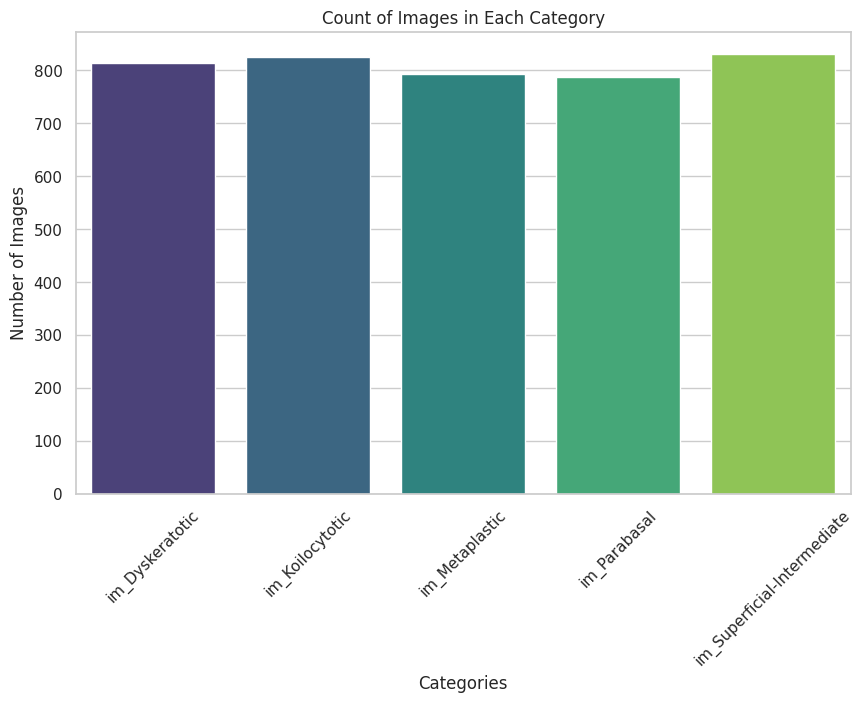

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()), palette='viridis')
plt.title('Count of Images in Each Category')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()


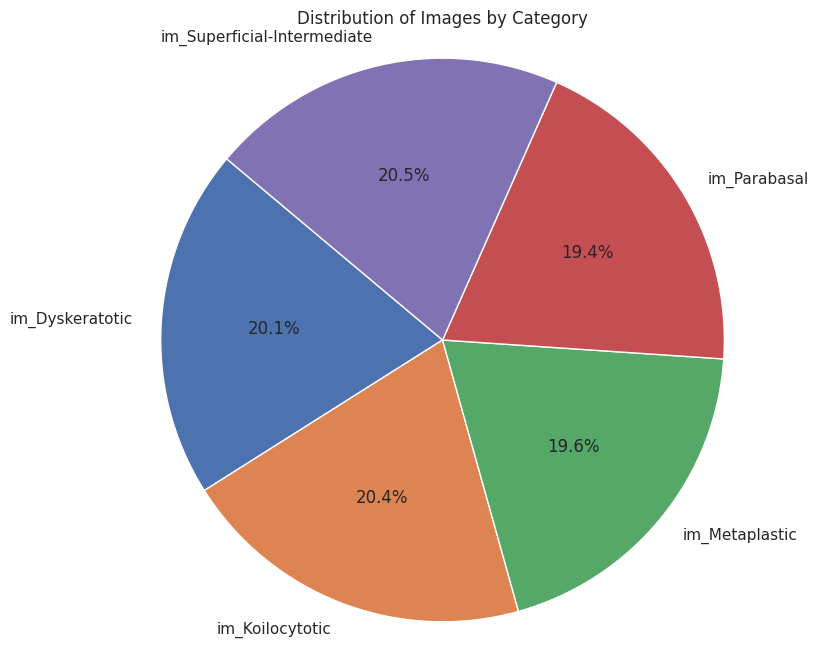

In [18]:
plt.figure(figsize=(8, 8))
plt.pie(image_counts.values(), labels=image_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Images by Category')
plt.axis('equal')
plt.show()

In [19]:
import cv2

Displaying variety of images in diffrent conditions

In [20]:
def display_images_from_folders(base_dir, categories, num_images=5):
    plt.figure(figsize=(15, 10))

    for i, category in enumerate(categories):
        category_path = os.path.join(base_dir, category, category, "CROPPED")
        image_files = [f for f in os.listdir(category_path) if f.endswith(('.bmp', '.jpg', '.png'))]

        for j, image_file in enumerate(image_files[:num_images]):

            img_path = os.path.join(category_path, image_file)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.subplot(len(categories), num_images, i * num_images + j + 1)
            plt.imshow(image)
            plt.axis('off')
            plt.title(f"{category}")

    plt.tight_layout()
    plt.show()

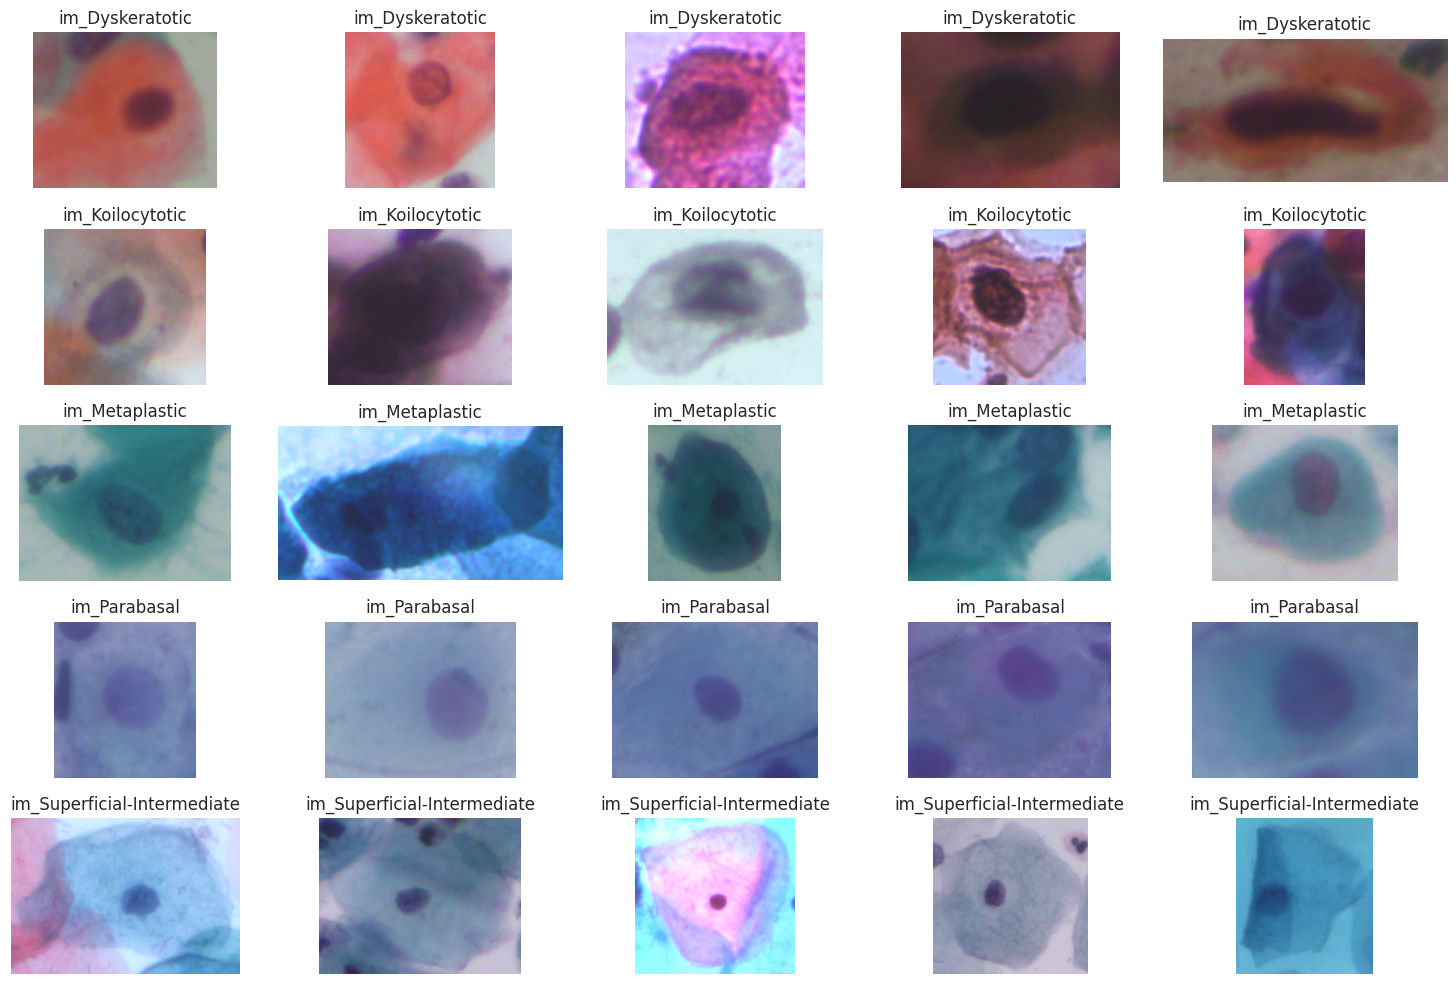

In [21]:
display_images_from_folders(base_dir, categories, num_images=5)

Making path for better storing of image

In [22]:
def create_image_paths_dataframe(base_dir, categories):
    data = []

    for category in categories:
        category_path = os.path.join(base_dir, category, category, "CROPPED")

        image_files = [f for f in os.listdir(category_path) if f.endswith(('.bmp', '.jpg', '.png'))]

        for image_file in image_files:
            img_path = os.path.join(category_path, image_file)
            data.append({'image_path': img_path, 'label': category})

    df_image_paths = pd.DataFrame(data)

    return df_image_paths

In [23]:
df_image_paths = create_image_paths_dataframe(base_dir, categories)
df_image_paths.head()

,image_path,label
0,/content/dataset/im_Dyskeratotic/im_Dyskeratot...,im_Dyskeratotic
1,/content/dataset/im_Dyskeratotic/im_Dyskeratot...,im_Dyskeratotic
2,/content/dataset/im_Dyskeratotic/im_Dyskeratot...,im_Dyskeratotic
3,/content/dataset/im_Dyskeratotic/im_Dyskeratot...,im_Dyskeratotic
4,/content/dataset/im_Dyskeratotic/im_Dyskeratot...,im_Dyskeratotic


In [24]:
df_image_paths.tail()

,image_path,label
4044,/content/dataset/im_Superficial-Intermediate/i...,im_Superficial-Intermediate
4045,/content/dataset/im_Superficial-Intermediate/i...,im_Superficial-Intermediate
4046,/content/dataset/im_Superficial-Intermediate/i...,im_Superficial-Intermediate
4047,/content/dataset/im_Superficial-Intermediate/i...,im_Superficial-Intermediate
4048,/content/dataset/im_Superficial-Intermediate/i...,im_Superficial-Intermediate


In [25]:
df_image_paths['label'].unique()

array(['im_Dyskeratotic', 'im_Koilocytotic', 'im_Metaplastic',
       'im_Parabasal', 'im_Superficial-Intermediate'], dtype=object)

In [26]:
df_image_paths['label'].value_counts()

,count
label,
im_Superficial-Intermediate,831
im_Koilocytotic,825
im_Dyskeratotic,813
im_Metaplastic,793
im_Parabasal,787


Handling imbalances of our datsets

In [27]:
from imblearn.over_sampling import RandomOverSampler

In [28]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df_image_paths[['image_path']], df_image_paths['label'])

In [29]:
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['label'] = y_resampled


In [30]:
print("\nClass distribution after oversampling:")
print(df_resampled['label'].value_counts())


Class distribution after oversampling:
label
im_Dyskeratotic                831
im_Koilocytotic                831
im_Metaplastic                 831
im_Parabasal                   831
im_Superficial-Intermediate    831
Name: count, dtype: int64


In [31]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

In [32]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4155 entries, 0 to 4154
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  4155 non-null   object
 1   label       4155 non-null   object
dtypes: object(2)
memory usage: 65.0+ KB


In [33]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,
    shuffle=True,
    random_state=42,
    stratify=df_resampled['label']
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['label']
)

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)

Found 3324 validated image filenames belonging to 5 classes.
Found 415 validated image filenames belonging to 5 classes.
Found 416 validated image filenames belonging to 5 classes.


In [35]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using GPU


In [37]:
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

input_shape = (224, 224, 3)
num_classes = len(train_gen_new.class_indices)

cnn_model = create_cnn_model(input_shape, num_classes)

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [38]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [40]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 25s 89ms/step - accuracy: 0.4769 - loss: 1.3389 - val_accuracy: 0.7277 - val_loss: 0.7706
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.7166 - loss: 0.7552 - val_accuracy: 0.7614 - val_loss: 0.6657
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.7759 - loss: 0.6241 - val_accuracy: 0.8048 - val_loss: 0.5589
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.7918 - loss: 0.5630 - val_accuracy: 0.8145 - val_loss: 0.5524
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.8153 - loss: 0.4953 - val_accuracy: 0.8289 - val_loss: 0.5057
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.8591 - loss: 0.3970 - val_accuracy: 0.8096 - val_loss: 0.5193
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.8545 - loss: 0.3927 - val_accuracy: 0.8434 - val_loss: 0.4634
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.8891 - loss: 0.3107 - val

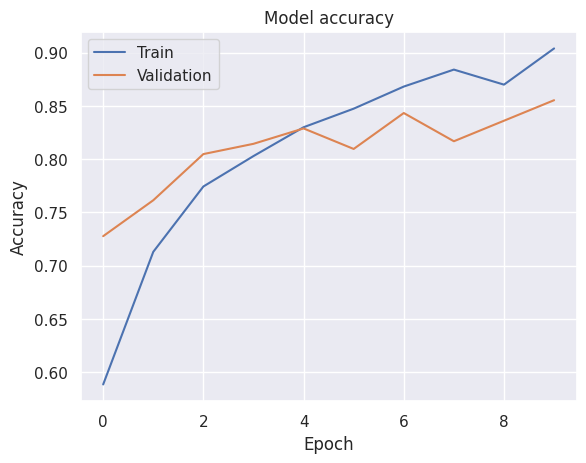

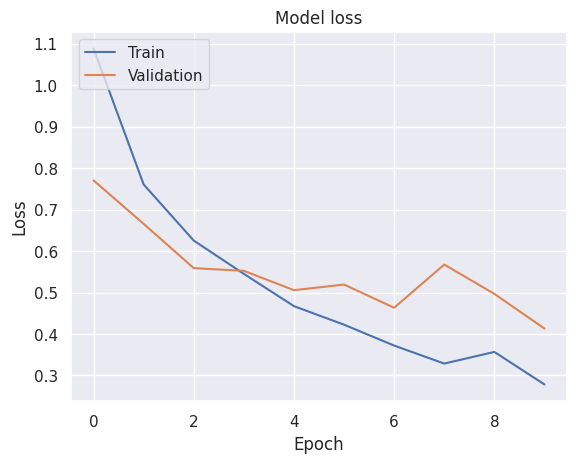

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [42]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [43]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

                             precision    recall  f1-score   support

            im_Dyskeratotic       0.85      0.99      0.92        83
            im_Koilocytotic       0.80      0.78      0.79        83
             im_Metaplastic       0.88      0.84      0.86        83
               im_Parabasal       0.94      0.90      0.92        84
im_Superficial-Intermediate       0.87      0.82      0.84        83

                   accuracy                           0.87       416
                  macro avg       0.87      0.87      0.87       416
               weighted avg       0.87      0.87      0.87       416



In [44]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

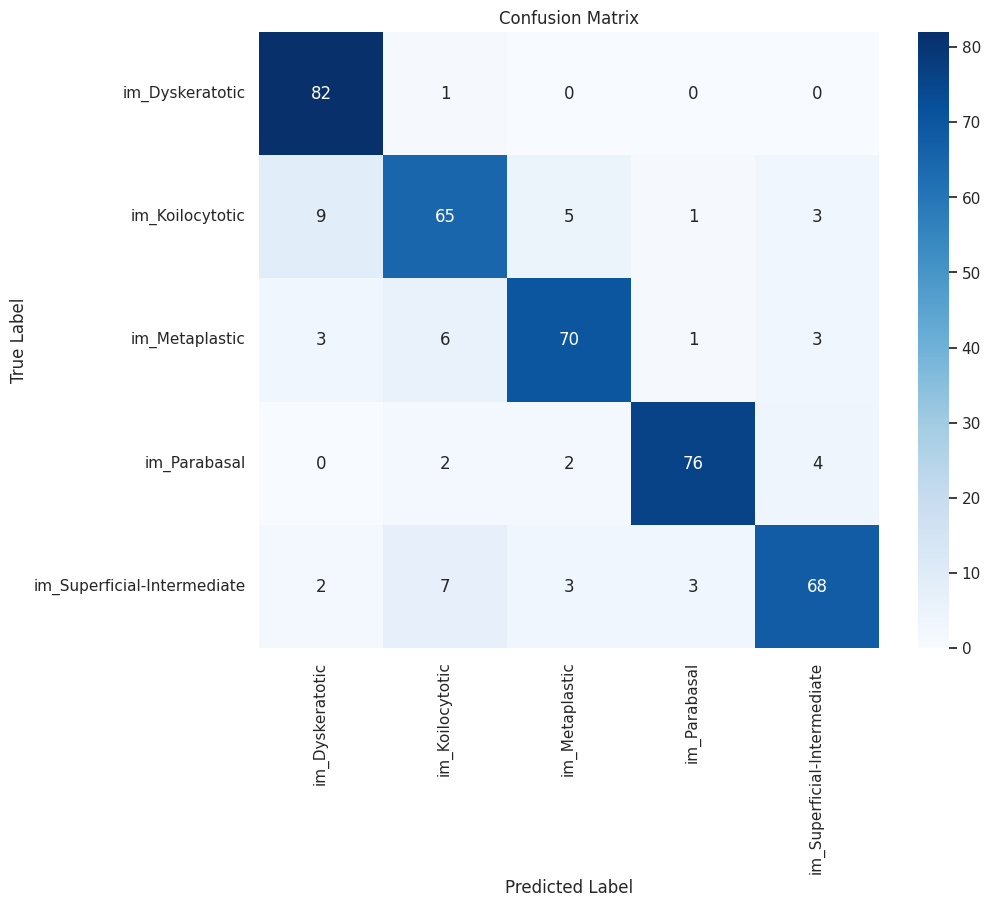

In [45]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

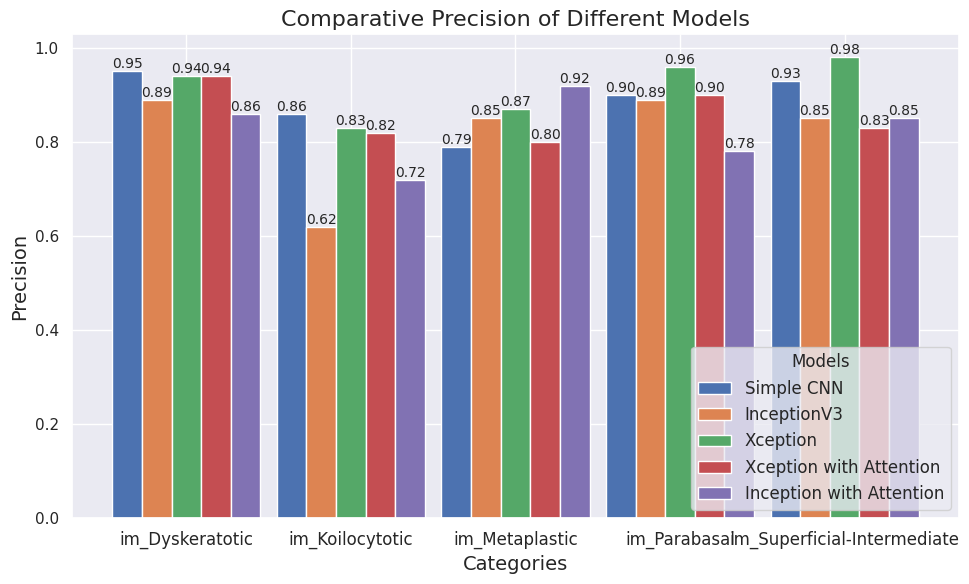

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Provided confusion matrix
confusion_matrix = np.array([
    [72, 10, 0, 0, 1],
    [2, 70, 9, 1, 1],
    [3, 0, 73, 4, 3],
    [0, 0, 4, 71, 9],
    [0, 5, 5, 3, 70]
])

# Calculate precision for each category
true_positives = np.diag(confusion_matrix)
false_positives = np.sum(confusion_matrix, axis=0) - true_positives
precision = true_positives / (true_positives + false_positives)

# Updated precision values for "Xception with Attention" as an example
data = {
    'Category': [
        'im_Dyskeratotic',
        'im_Koilocytotic',
        'im_Metaplastic',
        'im_Parabasal',
        'im_Superficial-Intermediate'
    ],
    'Simple CNN': [0.95, 0.86, 0.79, 0.90, 0.93],
    'InceptionV3': [0.89, 0.62, 0.85, 0.89, 0.85],
    'Xception': [0.94, 0.83, 0.87, 0.96, 0.98],
    'Xception with Attention': precision.round(2),  # Updated values
    'Inception with Attention': [0.86, 0.72, 0.92, 0.78, 0.85]
}

df = pd.DataFrame(data)
df.set_index('Category', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.18
x = np.arange(len(df.index))

for i, model in enumerate(df.columns):
    bars = ax.bar(x + i * bar_width, df[model], width=bar_width, label=model)
    for bar in bars:
        yval = bar.get_height()
        ax.annotate(f'{yval:.2f}', xy=(bar.get_x() + bar.get_width() / 2, yval),
                    ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Categories', fontsize=14)
ax.set_ylabel('Precision', fontsize=14)
ax.set_title('Comparative Precision of Different Models', fontsize=16)
ax.set_xticks(x + bar_width * 2)
ax.set_xticklabels(df.index, fontsize=12)
ax.legend(title='Models', fontsize=12, loc='lower right')

plt.tight_layout()
plt.show()


In [47]:
cnn_model.save('cancer_classifier.keras')

In [48]:
from google.colab import files
files.download('cancer_classifier.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
with zipfile.ZipFile('cancer_classifier.zip', 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write('cancer_classifier.keras')

# Verify the zip file has been created
os.listdir()  # List the files to check

['.config',
 'drive',
 'cancer_classifier.zip',
 'cancer_classifier.keras',
 'dataset',
 'sample_data']

In [51]:
import shutil

# Move the zip file to Google Drive (change path if necessary)
shutil.move('cancer_classifier.zip', '/content/drive/My Drive/cancer_classifier.zip')


'/content/drive/My Drive/cancer_classifier.zip'